# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
It is classification. Because the prediction is from some given labels: either "need" (otherwise they will fail) or "don't need" (they can graduate) early intervention. 

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

%matplotlib inline
import matplotlib.pyplot as plt

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


In [2]:
a = student_data
print "Columns:", a.columns
print ""
print "Indexes:", a.index

Columns: Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'passed'],
      dtype='object')

Indexes: RangeIndex(start=0, stop=395, step=1)


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [3]:
# TODO: Calculate number of students
print "The stduent data is a numpy array?", isinstance(student_data, np.ndarray)
print "Is it a pandas dataframe?", isinstance(student_data, pd.DataFrame)
print "The shape of student data:", student_data.shape
print "="*30
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1] - 1

# TODO: Calculate passing students
n_passed = np.sum(student_data['passed']=='yes')

# TODO: Calculate failing students
n_failed = np.sum(student_data['passed']=='no')

# TODO: Calculate graduation rate
grad_rate = float(100*n_passed) / float(n_students)

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

The stduent data is a numpy array? False
Is it a pandas dataframe? True
The shape of student data: (395, 31)
Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [4]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [5]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=95, random_state=0)
# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


In [7]:
print X_train.head()
print X_test.head()

     school_GP  school_MS  sex_F  sex_M  age  address_R  address_U  \
63           1          0      1      0   16          0          1   
245          1          0      0      1   16          0          1   
154          1          0      1      0   17          0          1   
311          1          0      1      0   19          0          1   
81           1          0      0      1   15          0          1   

     famsize_GT3  famsize_LE3  Pstatus_A    ...     higher  internet  \
63             1            0          0    ...          1         1   
245            1            0          0    ...          1         1   
154            1            0          0    ...          1         0   
311            1            0          0    ...          0         1   
81             1            0          0    ...          1         1   

     romantic  famrel  freetime  goout  Dalc  Walc  health  absences  
63          0       3         4      4     2     4       4         2  
245 

## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **
(1) K-Nearest Neighbors (KNN):

KNN is a non-parametric method, which does not require assumptions on the underlying distribution of the data (reference 1). KNN is good for applications where people have little knowledge about the structure of the data. A shortcoming of KNN is that it is sensitive to local structure of data, noise or redundent features (reference 2). It is often used for similarity-based classification or regression. One application of KNN is recommendation system, where items are recommended based on how similar they are to customers' choice.

The training dataset has only 300 data samples, which might not be sufficient to train very complex models. KNN doesn't have any assumption on a specific distribution or require large amount of data, and thus could be a good fit for this project.  

(2) Decision Tree:

Decision tree is a simple and effective tool for rule-based classification. While most of the classifiers require numeric data, decision trees can handle both numeric and categorical data. There are some limitations of decision tree classifier. For example, it tends to get over-complex to fit every variation in the data and cause over-fitting. If the data is unbalanced, it generates biased tree. But these problems can be mitigated with a careful design of the learning algorithm (reference 3). Decision tree has been used in many different fields. For instance, Set-Enumeration (SE) trees were used by NASA scientists to automatically catelogue and characterize satellite imagery. More examples can be found at (reference 4). 

Decision tree is widely applicable, and in addition, it is easy to understand and to interpret that will help the educator better understand the reasons responsible for studying problems. Therefore, decision tree is selected as a candidate model for this problem. 

(3) Random Forest:

Random forest classifier can improve the accuracy of single decision trees. And in addition, it is able to deal with unbalanced data or missing values and it runs very fast compared with other complicated classifiers. The weakness of random forests is when used for regression, they can't predict beyong the range of training data and in some cases, it tends to overfit the data (https://citizennet.com/blog/2012/11/10/random-forests-ensembles-and-performance-metrics/).  

Random forest classifier has a broad spectrum of applications in practice. In bioinformatics, it was used to identify diseases associated genes from genome wide association studies (reference 6). In computer vision, it is used in head pose estimation for real time face analysis (reference 7). 

This project is characterized by its limited data size and high-dimensional features. As the random forest classifier has its own advantages in dealing with small but high-dimensional dataset efficiently, it is provided as an alternative model for this problem. 


### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [8]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [9]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
from sklearn.neighbors import KNeighborsClassifier
# from sklearn import model_B
from sklearn.tree import DecisionTreeClassifier
# from sklearn import model_C
from sklearn.ensemble import RandomForestClassifier

# TODO: Initialize the three models
clf_knn = KNeighborsClassifier()
clf_tree = DecisionTreeClassifier(random_state=0)
clf_forest = RandomForestClassifier(random_state=0)

# # TODO: Set up the training set sizes
# X_train_100 = X_train[0:100]
# y_train_100 = y_train[0:100]

# X_train_200 = X_train[0:200]
# y_train_200 = y_train[0:200]

# X_train_300 = X_train
# y_train_300 = y_train

# # TODO: Execute the 'train_predict' function for each classifier and each training set size
# # train_predict(clf, X_train, y_train, X_test, y_test)
# clfs = {'KNN':clf_A, 'Decision Tree':clf_B, 'Random Forest':clf_C}
# for clf_name, clf_var in clfs.iteritems():
#     print ''
#     print '='*30
#     print clf_name
#     train_predict(clf_var, X_train_100, y_train_100, X_test, y_test)
#     print ''
#     train_predict(clf_var, X_train_200, y_train_200, X_test, y_test)
#     print ''
#     train_predict(clf_var, X_train_300, y_train_300, X_test, y_test)
    
clfs = [clf_knn, clf_tree, clf_forest]
train_size = [100, 200, 300]

for clf in clfs:
    print '='*30
    print clf.__class__.__name__
    
    for size in train_size:
        train_predict(clf, X_train[:size], y_train[:size], X_test, y_test)
        print ''

KNeighborsClassifier
Training a KNeighborsClassifier using a training set size of 100. . .
Trained model in 0.0010 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.7972.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7068.

Training a KNeighborsClassifier using a training set size of 200. . .
Trained model in 0.0010 seconds
Made predictions in 0.0040 seconds.
F1 score for training set: 0.8571.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7121.

Training a KNeighborsClassifier using a training set size of 300. . .
Trained model in 0.0010 seconds
Made predictions in 0.0070 seconds.
F1 score for training set: 0.8722.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.7482.

DecisionTreeClassifier
Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0010 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set:

To further investigate what features play an important role in decision-making, the trained decision tree is visualized as the figure below: 

In [10]:
## If we would like to visualize the tree, uncomment the following:
## The *.dot file can be rendered to image at: http://www.webgraphviz.com/
# from sklearn.tree import export_graphviz
# export_graphviz(clfs['Decision Tree'], out_file='tree.dot', max_depth=2, filled=True)

![alt text](tree.png "The Decision Tree")

In [11]:
print "The first factor:", X_train.columns[32]
print "The second factor:", X_train.columns[33]
print "The third factor:", X_train.columns[47]

The first factor: failures
The second factor: schoolsup
The third factor: absences


The structure of the tree shows that the most indicative feature for a potential studying problem is the number of past class failures ("failures"), followed by extra educational support("schoolsup") and number of school absences("absences"). This information can be used to guide the focus of intervetion to those students who have shown certain signal of studying difficulty. For instance, if a student has failed in some classes, teachers should pay more attention to help him/her to prevent further problem. 

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - K-Nearest Neighbors**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0010           |       0.0020           |      0.7972      |    0.7068       |
| 200               |        0.0010           |       0.0020           |      0.8571      |    0.7121       |
| 300               |       <0.0001           |       0.0020           |      0.8722      |    0.7482       |

** Classifer 2 - Decision Tree**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     <0.0001             |        0.0010          |      1.0000      |     0.6942      |
| 200               |      0.0020             |       <0.0001          |      1.0000      |     0.7132      |
| 300               |      0.0030             |       <0.0001          |      1.0000      |     0.7167      |

** Classifer 3 - Random Forest**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |      0.0170             |         0.0010         |      0.9841      |     0.7119      |
| 200               |      0.0180             |         0.0010         |      1.0000      |     0.7761      |
| 300               |      0.0190             |         0.0010         |      0.9976      |     0.7344      |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

The number of data samples in this project is not very large (only 300 in the training set), but it is enough for the selected algorithms which are relatively simple and don't require large amount of data for training. In terms of model performance, both decision tree and random forest can achieve nearly perfect F1 score for the training data. For the test data, which is separated from the training process, the three classifiers have very close F1 score.

As a "lazy" learner, KNN needs very little training time but it takes a relatively longer time for prediction as it does most of its computation when a new test data comes. In contrast, the decision tree and the random forest classifier take longer time for training but they are both very efficient in the prediction phase.

In addition, the decision tree and its ensemble version (random forest) have an advantage in interpretability, which is valable for the educators to gain more insights from the data. Since ensembling could help improve the model accuracy and reduce over-fitting, random forest is chosen as the "best" model at this point. 



### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

Random forest is an ensemble method to use several simple classifiers called "decision tree" to make a prediction whether a student will pass or fail. 

Each single decision tree takes historical data on many students' performance ("graduate" or "fail") as well as their background information (called "features") and learns to make predictions just like an experienced teacher does. In this case, we have 30 such features, including their age, sex, their family size and so on, and the decision tree model could figure out which feature carries more weight in determining the success of a students based on how different the successful students and the students with difficulty are in this aspect, and makes a prediction for any new coming students with the necessary background information. 

A "random forest" is a "forest" of multiple decision trees. Just like a committee of professors could make a better judgement of a student's academic performance than a single professor does, the benefit of using a "forest" is that it could take into account the overall knowledge learnt through each single tree, and therefore it is less likely to make an error.    

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [12]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators': range(2,20), 'criterion':['gini', 'entropy'], 'max_depth':range(5,10), \
              'min_samples_split':range(2,5)}

# TODO: Initialize the classifier
clf = clf_forest

# TODO: Make an f1 scoring function using 'make_scorer' 
def my_f1_score(y_true, y_prd):
    return f1_score(y_true, y_prd, pos_label='yes')
f1_scorer = make_scorer(my_f1_score)
## Or the following is a more efficient way: 
# custom_f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train.as_matrix(), y_train.as_matrix())

# Get the estimator
clf = grid_obj.best_estimator_
print clf

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
Made predictions in 0.0090 seconds.
Tuned model has a training F1 score of 0.8571.
Made predictions in 0.0100 seconds.
Tuned model has a testing F1 score of 0.7862.


C:\Users\kliu14\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\kliu14\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


The grid search results is visualized in the figure below. When the decision tree is divided based on entropy and the minimum sample size required for a split is 3, the F1 score varies with the maximum depth and the number of estimators as the figure shows. Increasing the depth of trees doesn't improve the score in the range of test, while a larger number of estimators help the classifier achieve higher accuracy.  

[mean: 0.70855, std: 0.03883, params: {'min_samples_split': 2, 'n_estimators': 2, 'criterion': 'gini', 'max_depth': 5}, mean: 0.73757, std: 0.03054, params: {'min_samples_split': 2, 'n_estimators': 3, 'criterion': 'gini', 'max_depth': 5}, mean: 0.77020, std: 0.02631, params: {'min_samples_split': 2, 'n_estimators': 4, 'criterion': 'gini', 'max_depth': 5}]


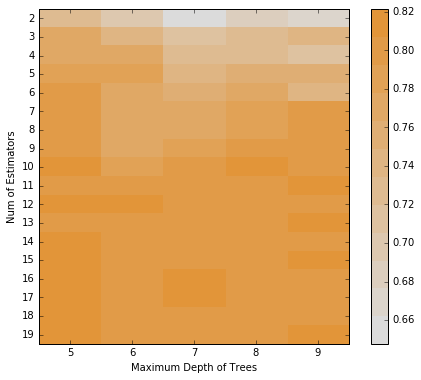

In [13]:
print grid_obj.grid_scores_[0:3]

test_score = []
for i in parameters['n_estimators']:
    for j in parameters['max_depth']:
        for test in grid_obj.grid_scores_:
            if test[0]['n_estimators']==i and test[0]['max_depth']==j \
                and test[0]['criterion']=='entropy' \
                and test[0]['min_samples_split']==3:
                test_score.append(test[1])
                continue

score_matrix = np.array(test_score).reshape((len(parameters['n_estimators']), len(parameters['max_depth'])))


from matplotlib import colors
from matplotlib.colors import ListedColormap

ddl_heat = ['#DBDBDB','#DCD5CC','#DCCEBE','#DDC8AF','#DEC2A0','#DEBB91',\
            '#DFB583','#DFAE74','#E0A865','#E1A256','#E19B48','#E29539']
ddlheatmap = colors.ListedColormap(ddl_heat)

plt.figure(figsize=(8, 6))
plt.imshow(score_matrix, interpolation='nearest', cmap=ddlheatmap, aspect=0.3)
plt.colorbar()

ytick_range = range(len(parameters['n_estimators']))
xtick_range = range(len(parameters['max_depth']))
plt.xticks(xtick_range, parameters['max_depth'])
plt.yticks(ytick_range, parameters['n_estimators'])
plt.xlabel('Maximum Depth of Trees')
plt.ylabel('Num of Estimators')
plt.show()

As a comparison, the simple decision tree is also tuned in a similar procedure. With the performance of decision tree, we will be able to tell how much the ensemble methods could improve model performance for this dataset. 

In [14]:
parameters_tree = {'criterion':['gini', 'entropy'], 'max_depth':range(5,10), 'min_samples_split':range(2,5)}
clf_tree = clf_tree

grid_tree = GridSearchCV(clf_tree, param_grid=parameters_tree, scoring=f1_scorer)
grid_tree.fit(X_train.as_matrix(), y_train.as_matrix())
clf = grid_tree.best_estimator_
print clf

print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
Made predictions in 0.0000 seconds.
Tuned model has a training F1 score of 0.8829.
Made predictions in 0.0000 seconds.
Tuned model has a testing F1 score of 0.7328.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

After tuning the model by grid search, the F1 score of the random forest for training and testing is 0.8571 and 0.7862, compared to 0.9976 and 0.7344 before tuning. The F1 score shows that the tuning process improved the model's performance in general situation (an increased F1 score for testing data) and reduced over-fitting (a smaller difference in training and testing). 

For this dataset, the random forest classifer only slightly outperforms the decision tree after tuning. But it is worth mentioning that this F1 score is only calculated from a random training/testing split. Considering the size of this dataset is limited, cross-validation should give a more complete evaluation of the performance of various classifiers. Among all the 48 numeric features, there also might be some redundency. The decision tree / random forest classifier provides information (gini or entropy) about the relative importance of different features, which could be useful to reduce feature redundency for further learning process.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### References:

[1] A detailed introduction to KNN: https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/

[2] KNN for classification: http://datamining.togaware.com/survivor/K_Nearest_Neighbours.html

[3] Decision tree classifier in sklearn: http://scikit-learn.org/stable/modules/tree.html

[4] Application of decision tree in a wide range of fields:　http://www.cbcb.umd.edu/~salzberg/docs/murthy_thesis/survey/node32.html

[5] A Gentle Introduction to Random Forests, Ensembles, and Performance Metrics in a Commercial System, avaiable at: https://citizennet.com/blog/2012/11/10/random-forests-ensembles-and-performance-metrics/

[6] Qi, Y. (2012). Random forest for bioinformatics. In Ensemble machine learning (pp. 307-323). Springer US.

[7] Fanelli, G., Dantone, M., Gall, J., Fossati, A., & Van Gool, L. (2013). Random forests for real time 3d face analysis. International Journal of Computer Vision, 101(3), 437-458.